In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load the Boston House Pricing dataset
dataset = load_boston()

# Create a dataframe from the data
df = pd.DataFrame(dataset.data)

# Replace column names with feature names
df.columns = dataset.feature_names

# Creating another column in the dataframe for the target prices
df['PRICE'] = dataset.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# Let's take the number of rooms as our X values
x = df.RM / max(df.RM)
y = df.PRICE / max(df.PRICE)
print(x.shape, y.shape)

(506,) (506,)


In [4]:
X = np.column_stack((np.ones(len(x)), x))

print(X.shape)
X[:5]

(506, 2)


array([[1.        , 0.74886105],
       [1.        , 0.73132118],
       [1.        , 0.81833713],
       [1.        , 0.79703872],
       [1.        , 0.81400911]])

In [5]:
y[:5]

0    0.480
1    0.432
2    0.694
3    0.668
4    0.724
Name: PRICE, dtype: float64

In [6]:
# Hyperparameters

iterations = 10001
alpha = 0.1

In [7]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [8]:
def gradient_descent(X, y, alpha, iterations):
    theta = np.zeros(2)
    m = len(y)

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        theta = np.array([t0, t1])
        
        if i % 1000 == 0:
            cost = compute_cost(X, y, theta)
            print('{}: theta_0: {} theta_1: {} cost: {}'.format(i, t0, t1, cost))

    return theta

In [9]:
theta = gradient_descent(X, y, alpha, iterations)

0: theta_0: 0.04506561264822134 theta_1: 0.03327904670154051 cost: 0.0894215476984524
1000: theta_0: -0.04211816908083552 theta_1: 0.6922741312741633 cost: 0.011347318076753987
2000: theta_0: -0.26637465961574713 theta_1: 1.004251376663602 cost: 0.009849574573361783
3000: theta_0: -0.41341417207766995 theta_1: 1.2088072490571162 cost: 0.009205678895828505
4000: theta_0: -0.5098243949143354 theta_1: 1.3429295465933937 cost: 0.00892886137493323
5000: theta_0: -0.5730382271135034 theta_1: 1.4308702665831077 cost: 0.008809854612582905
6000: theta_0: -0.6144859954489701 theta_1: 1.4885308522901044 cost: 0.00875869235435841
7000: theta_0: -0.6416622864635344 theta_1: 1.5263374923137767 cost: 0.008736697161690923
8000: theta_0: -0.6594811178015858 theta_1: 1.5511263842813827 cost: 0.008727241197132883
9000: theta_0: -0.6711644910066985 theta_1: 1.567379856279868 cost: 0.008723175978561053
10000: theta_0: -0.6788249939241062 theta_1: 1.578036861536528 cost: 0.008721428298360336


In [10]:
theta

array([-0.67882499,  1.57803686])

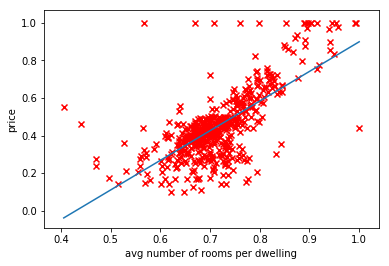

In [11]:
plt.scatter(x, y, marker='x', color='red')
plt.xlabel('avg number of rooms per dwelling')
plt.ylabel('price')
samples = np.linspace(min(x), max(x))
plt.plot(samples, theta[0] + theta[1] * samples)
plt.show()